In [36]:
import json
import numpy as np

In [37]:
json_path = 'train_data/ddqn_per_test/q_values_log.json'
# load into dict
with open(json_path, 'r') as f:
    q_values = json.load(f)


In [38]:
train_log_path = 'train_data/ddqn_per_test/training_logs.json'
with open(train_log_path, 'r') as f:
    train_logs = json.load(f)

In [39]:
len(train_logs['episode_lengths'])

300

In [40]:
frames_count = 0
episode_till = 250
for i in range(episode_till):
    frames_count += train_logs['episode_lengths'][i]

print(frames_count, train_logs['episode_lengths'][episode_till])

38288 207


In [41]:
len(q_values['target_q_values'])

59687

In [42]:
q_values.keys()

dict_keys(['target_q_values', 'current_q_values', 'next_q_values', 'dones', 'td_errors'])

In [43]:
new_q_values = {}
new_q_values = q_values.keys()

In [ ]:
print

In [61]:
print(q_values['td_errors'][frames_count])


0.4847022779285908


In [45]:
for key in q_values.keys():
    for i in range(len(q_values[key])):
        for j in range(len(q_values[key][i])):
            q_values[key][i][j] = q_values[key][i][j][0]
        q_values[key][i] = np.mean(q_values[key][i])
            

59687

In [53]:
target_q_values_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            target_q_values_list[i] = np.mean(q_values['target_q_values'][:skipped_frames])
    else:
        target_q_values_list[i] = np.mean(q_values['target_q_values'][frames_so_far - frames:frames_so_far])

In [55]:
current_q_values_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            current_q_values_list[i] = np.mean(q_values['current_q_values'][:skipped_frames])
    else:
        current_q_values_list[i] = np.mean(q_values['current_q_values'][frames_so_far - frames:frames_so_far])

In [57]:
next_q_values_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            next_q_values_list[i] = np.mean(q_values['next_q_values'][:skipped_frames])
    else:
        next_q_values_list[i] = np.mean(q_values['next_q_values'][frames_so_far - frames:frames_so_far])

In [62]:
td_errors_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            td_errors_list[i] = np.mean(q_values['td_errors'][:skipped_frames])
    else:
        td_errors_list[i] = np.mean(q_values['td_errors'][frames_so_far - frames:frames_so_far])

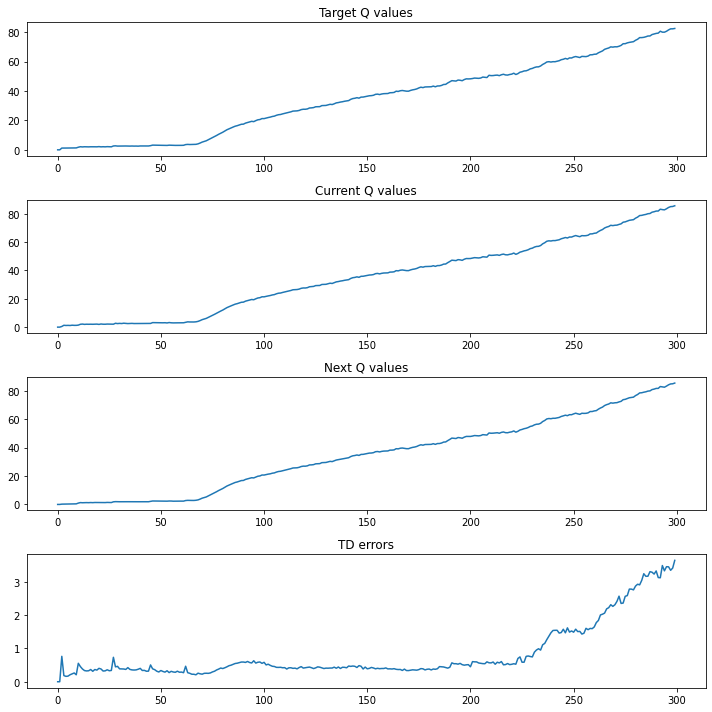

In [67]:
import matplotlib.pyplot as plt

# axes subplot with all 4 lists in different axes
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ax[0].plot(target_q_values_list)
ax[0].set_title('Target Q values')
ax[1].plot(current_q_values_list)
ax[1].set_title('Current Q values')
ax[2].plot(next_q_values_list)
ax[2].set_title('Next Q values')
ax[3].plot(td_errors_list)
ax[3].set_title('TD errors')
fig.tight_layout()


In [ ]:
# 